In [44]:
from pamplona_weather import get_pamplona_weather_history
from datetime import datetime

years = [2013, 2014, 2015, 2016, 2017]
sanfermines_weather_history = {}

weather_conditions = set()
for year in years:
    sanfermines_weather_history[year] = get_pamplona_weather_history(
        start = datetime(day = 6, month = 7, year = year),
        end = datetime(day = 15, month = 7, year = year))
    for observation in sanfermines_weather_history[year]:
        weather_conditions |=\
            set([condition for condition in observation.get_conditions()]) 
weather_conditions = list(weather_conditions)


sanfermines_weather_conditions = {}

for year in years:
    frequencies = []

    for condition in weather_conditions:
        frequency = 0
        for observation in sanfermines_weather_history[year]:
            frequency += observation.get_conditions().count(condition)
        frequencies.append(frequency)
        
    sanfermines_weather_conditions[year] =\
        (weather_conditions, frequencies)
    
    

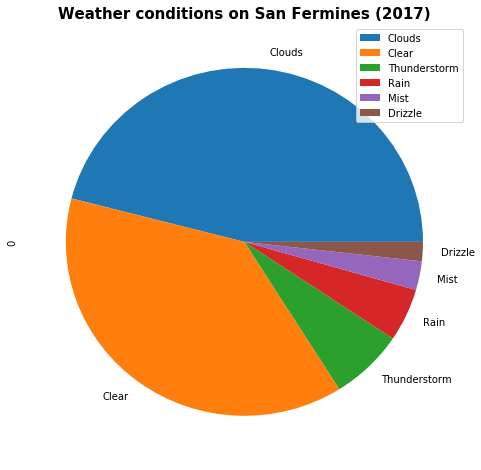

In [50]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

conditions, frequencies = sanfermines_weather_conditions[2017]

conditions, frequencies = zip(*sorted(zip(*sanfermines_weather_conditions[2017]),
    key = lambda entry:entry[1], reverse = True))
conditions, frequencies = list(conditions), list(frequencies)


frame = pd.DataFrame(data = frequencies, index = conditions)

fig, ax = plt.subplots(figsize = (8, 8))
ax.set_title('Weather conditions on San Fermines (2017)', fontsize=15, fontweight='bold')
plot = frame.plot.pie(ax = ax, subplots = True)

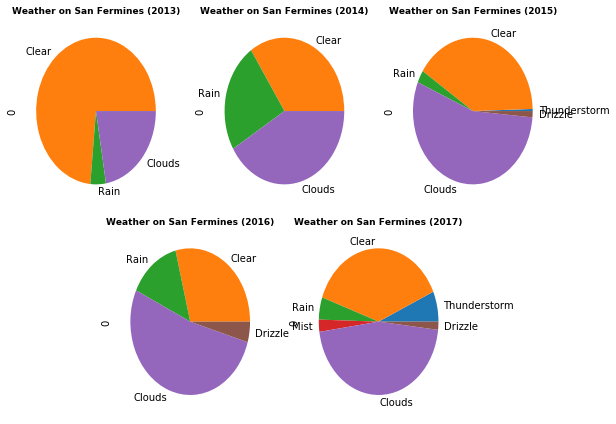

In [53]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

fig = plt.figure(figsize = (8, 6))
ax1 = plt.subplot2grid(shape=(2, 6), loc=(0,0), colspan=2)
ax2 = plt.subplot2grid((2,6), (0,2), colspan=2)
ax3 = plt.subplot2grid((2,6), (0,4), colspan=2)
ax4 = plt.subplot2grid((2,6), (1,1), colspan=2)
ax5 = plt.subplot2grid((2,6), (1,3), colspan=2)
axes = {2013:ax1, 2014:ax2, 2015:ax3, 2016:ax4, 2017:ax5}

for year in years:
    ax = axes[year]
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)

    ax.set_title('Weather on San Fermines ({})'.format(year), fontsize=9, fontweight='bold')

    conditions, frequencies = sanfermines_weather_conditions[year]
    frame = pd.DataFrame(data = frequencies, index = conditions)
    
    plot = frame.plot.pie(ax = ax, legend = None,
                          stacked = False, subplots = True)

fig.tight_layout()